# Installs & downloads

In [1]:
!pip install opencv-python

In [4]:
# yolo weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-04-20 11:58:07--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  35.9MB/s    in 7.1s    

2024-04-20 11:58:15 (33.5 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [5]:
# config
!wget https://raw.githubusercontent.com/arunponnusamy/object-detection-opencv/master/yolov3.cfg

--2024-04-20 11:58:15--  https://raw.githubusercontent.com/arunponnusamy/object-detection-opencv/master/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s      

2024-04-20 11:58:15 (35.3 MB/s) - ‘yolov3.cfg.1’ saved [8342/8342]



In [6]:
# classes
!wget https://raw.githubusercontent.com/arunponnusamy/object-detection-opencv/master/yolov3.txt

--2024-04-20 11:58:15--  https://raw.githubusercontent.com/arunponnusamy/object-detection-opencv/master/yolov3.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 620 [text/plain]
Saving to: ‘yolov3.txt.1’

yolov3.txt.1        100%[===================>]     620  --.-KB/s    in 0s      

2024-04-20 11:58:15 (33.7 MB/s) - ‘yolov3.txt.1’ saved [620/620]



In [7]:
# sample image
!wget https://hips.hearstapps.com/hmg-prod/images/man-rides-his-bike-in-the-forest-with-his-dog-on-a-royalty-free-image-841941006-1551452908.jpg

!wget https://raw.githubusercontent.com/arunponnusamy/object-detection-opencv/master/dog.jpg

--2024-04-20 11:58:15--  https://hips.hearstapps.com/hmg-prod/images/man-rides-his-bike-in-the-forest-with-his-dog-on-a-royalty-free-image-841941006-1551452908.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388417 (379K) [image/jpeg]
Saving to: ‘man-rides-his-bike-in-the-forest-with-his-dog-on-a-royalty-free-image-841941006-1551452908.jpg.1’

man-rides-his-bike- 100%[===================>] 379.31K  --.-KB/s    in 0.04s   

2024-04-20 11:58:15 (9.05 MB/s) - ‘man-rides-his-bike-in-the-forest-with-his-dog-on-a-royalty-free-image-841941006-1551452908.jpg.1’ saved [388417/388417]

--2024-04-20 11:58:15--  https://raw.githubusercontent.com/arunponnusamy/object-detection-opencv/master/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.13

In [8]:
# ocr model
!wget https://raw.githubusercontent.com/shimat/opencvsharp/main/test/OpenCvSharp.Tests/_data/text/textbox.prototxt
!wget https://github.com/sghoshcvc/TextBox-Models/raw/master/textbox.caffemodel

--2024-04-20 11:58:16--  https://raw.githubusercontent.com/shimat/opencvsharp/main/test/OpenCvSharp.Tests/_data/text/textbox.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24867 (24K) [text/plain]
Saving to: ‘textbox.prototxt.1’

textbox.prototxt.1  100%[===================>]  24.28K  --.-KB/s    in 0.001s  

2024-04-20 11:58:16 (17.5 MB/s) - ‘textbox.prototxt.1’ saved [24867/24867]

--2024-04-20 11:58:16--  https://github.com/sghoshcvc/TextBox-Models/raw/master/textbox.caffemodel
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sghoshcvc/TextBox-Models/master/textbox.caffemodel [follow

# Imports

In [27]:
# import required packages
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import urllib.request
import requests
from io import BytesIO

# Read data

In [10]:
image = cv2.imread('sample.jpg')

In [11]:
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

In [12]:
classes = None
with open('yolov3.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [13]:
# generate different colors for different classes
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

In [14]:
# read pre-trained model and config file
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [15]:
# create input blob
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

# set input blob for the network
net.setInput(blob)

In [16]:
# function to get the output layer names in the architecture
def get_output_layers(net):
    layer_names = net.getLayerNames()
    # print("Layer names:", layer_names)

    output_layers_indices = net.getUnconnectedOutLayers()
    output_layers = [layer_names[idx - 1] for idx in output_layers_indices]
    # print("Output layers:", output_layers)

    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [17]:
# run inference through the network
# and gather predictions from output layers
outs = net.forward(get_output_layers(net))

# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# for each detetion from each output layer
# get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

print(class_ids)

[0, 0, 0, 1, 1, 16, 16, 16, 16]


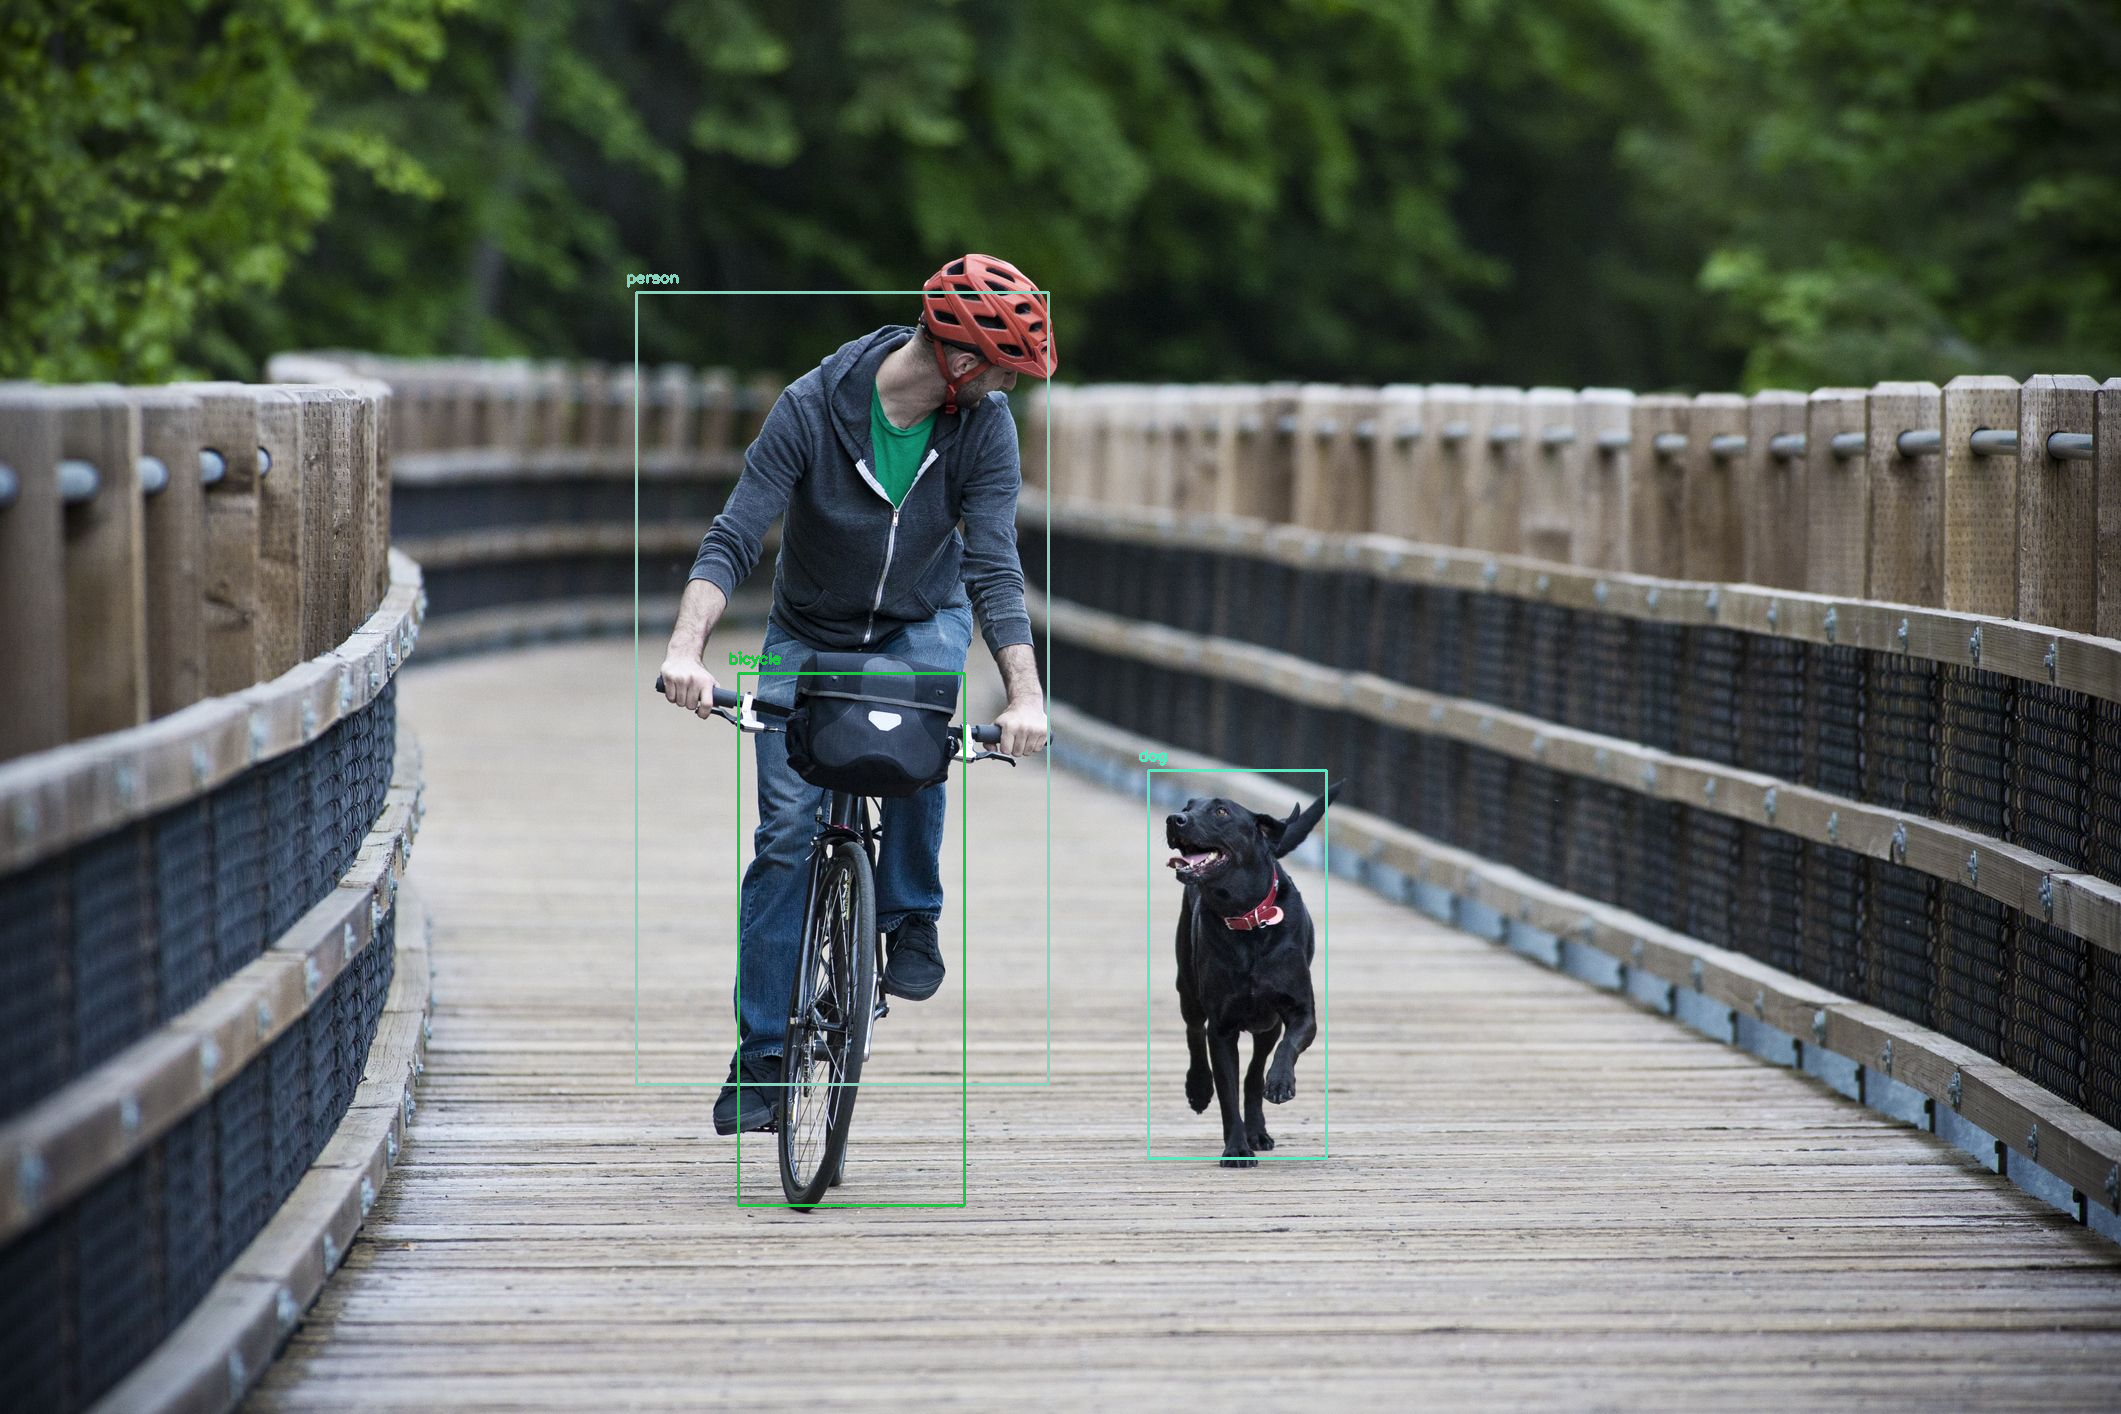

In [18]:
# apply non-max suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# go through the detections remaining
# after nms and draw bounding box
for i in indices:
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]

    draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

# display output image
cv2_imshow(image)

# save output image to disk
cv2.imwrite("object-detection.jpg", image)

# release resources
cv2.destroyAllWindows()

# Mass detection functions

### load weights, classes and configs

In [19]:
classes = None
with open('yolov3.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [20]:
# generate different colors for different classes
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

In [21]:
# read pre-trained model and config file
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

### helper functions

In [22]:
# function to get the output layer names in the architecture
def get_output_layers(net):
    layer_names = net.getLayerNames()
    # print("Layer names:", layer_names)

    output_layers_indices = net.getUnconnectedOutLayers()
    output_layers = [layer_names[idx - 1] for idx in output_layers_indices]
    # print("Output layers:", output_layers)

    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

### get image from url

In [23]:
def read_image_from_url(url):
    req = urllib.request.urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)

    # Decode the image
    image = cv2.imdecode(arr, -1)

    return image

### get classes from image

In [31]:
scale = 0.00392

def get_classes_from_image(image_path):
    image = cv2.imread(image_path)
    Width = image.shape[1]
    Height = image.shape[0]

    # create input blob
    blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

    # set input blob for the network
    net.setInput(blob)

    # run inference through the network and gather predictions from output layers
    outs = net.forward(get_output_layers(net))

    # initialization
    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.5
    nms_threshold = 0.4

    # for each detetion from each output layer get the confidence, class id, bounding box params
    # ignore weak detections (confidence < 0.5)
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # apply non-max suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    # go through the detections remaining
    # after nms and draw bounding box
    for i in indices:
        # i = i[0]
        box = boxes[i]
        x = box[0]
        y = box[1]
        w = box[2]
        h = box[3]

        draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

    # display output image
    cv2_imshow(image)

    # save output image to disk
    cv2.imwrite("object-detection.jpg", image)

    # release resources
    cv2.destroyAllWindows()


In [50]:
!wget https://images.unsplash.com/photo-1529518969858-8baa65152fc8?w=400 -O guitar_man.jpg

--2024-04-20 12:17:45--  https://images.unsplash.com/photo-1529518969858-8baa65152fc8?w=400
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28922 (28K) [image/jpeg]
Saving to: ‘guitar_man.jpg’

guitar_man.jpg      100%[===================>]  28.24K  --.-KB/s    in 0.003s  

2024-04-20 12:17:45 (8.77 MB/s) - ‘guitar_man.jpg’ saved [28922/28922]



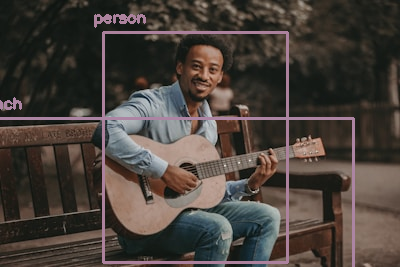

In [51]:
get_classes_from_image('guitar_man.jpg')

### get classes from image url

In [44]:
def get_classes_from_image_url(image_url):
    response = requests.get(image_url)
    image_array = np.array(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image_array, -1)

    Width = image.shape[1]
    Height = image.shape[0]

    # create input blob
    blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

    # set input blob for the network
    net.setInput(blob)

    # run inference through the network and gather predictions from output layers
    outs = net.forward(get_output_layers(net))

    # initialization
    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.5
    nms_threshold = 0.4

    # for each detection from each output layer get the confidence, class id, bounding box params
    # ignore weak detections (confidence < 0.5)
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # apply non-max suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    # Extract detected classes after non-max suppression
    detected_classes = [classes[class_ids[i]] for i in indices]

    return detected_classes

In [46]:
get_classes_from_image_url('https://images.unsplash.com/photo-1510915361894-db8b60106cb1?w=416')

[]